<a href="https://colab.research.google.com/github/shreyamanapure/shreyamanapure/blob/main/IRIS_UNSUPERVISED_LEARNING_SPARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME - SHREYA MANAPURE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


In [2]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape


(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

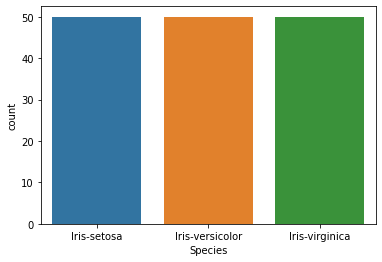

In [7]:
sns.countplot(x='Species',data=df,)
plt.show()

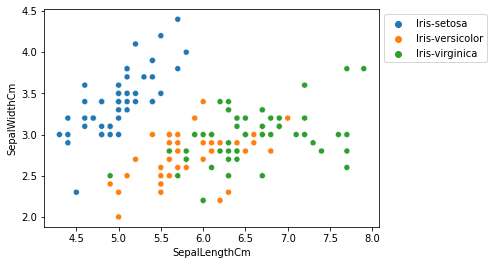

In [8]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,)

plt.legend(bbox_to_anchor=(1,1),loc=2)

plt.show()


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


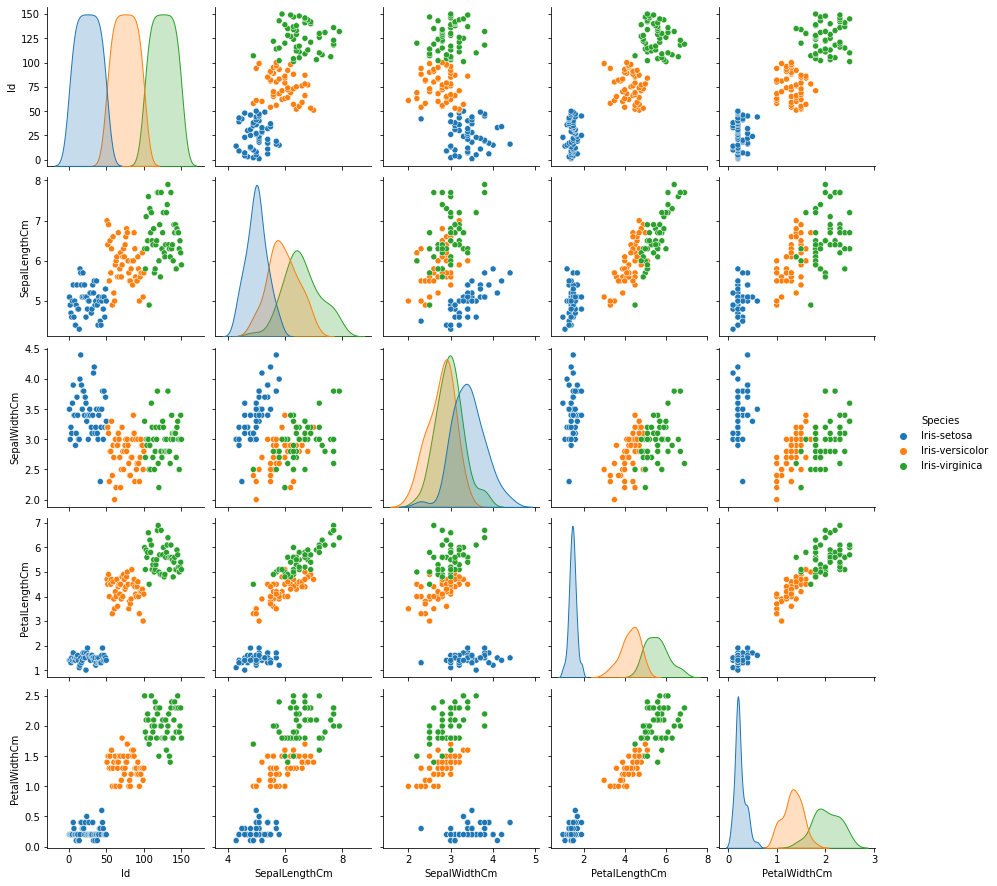

In [10]:
sns.pairplot(df, hue='Species')

In [11]:
df.drop(columns=['Id'],inplace=True)

In [12]:
x = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
     

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [15]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

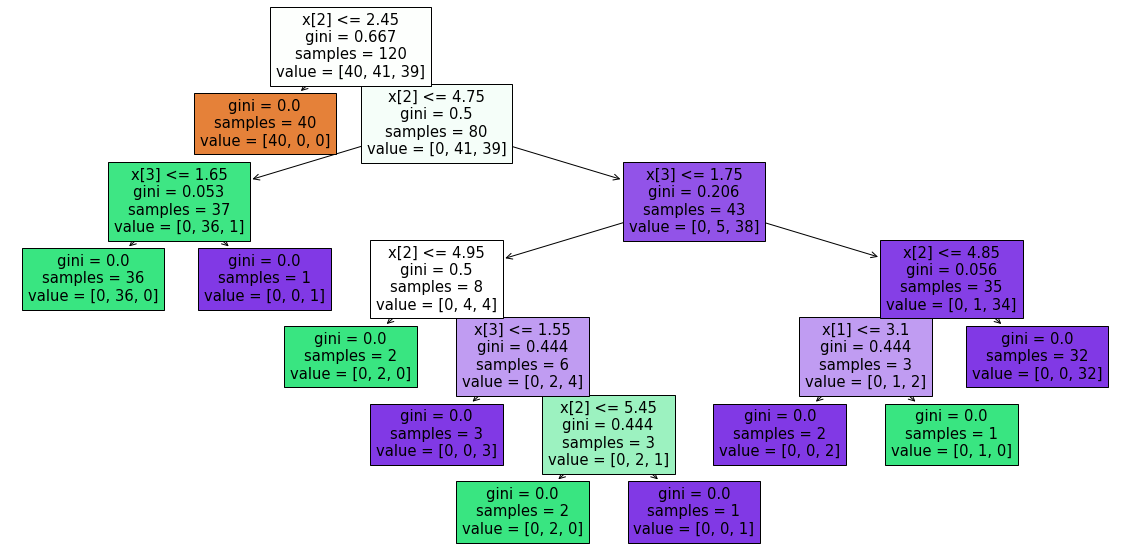

In [16]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()
     

In [17]:
print("'Accuracy score is:", model.score(x_test,y_test)*100)

'Accuracy score is: 100.0


In [18]:
from sklearn.metrics import accuracy_score

y_hat = model.predict(x_test)
y_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test, y_hat)*100,'%')
     

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


In [19]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,5.1,3.8,1.5,0.3,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica


In [20]:
data = [[6.3,2.7,4.9,1.8]]

print(model.predict(data))

['Iris-virginica']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
